
# Introduction to Clustering and K-Means

---

![](https://snag.gy/kYWumd.jpg)

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 

<a id='unsupervised'></a>

## Unsupervised learning

---

> **Supervised --> Classification** - create a model to predict which group a point belongs to.

> **Unsupervised --> Clustering** - find groups that exist in the data already.

Until now, we haven't talked much about unsupervised learning.  We use unsupervised methods when we don't have labeled  data. There are no true targets to predict, we derive the likely categories from the structure in our data.

| Pros | Cons |
|---|---|
| No labels | Difficult to evaluate correctness without subject matter expertise |
| Few or no assumptions about data | Scaling / normalization often required |
| Useful for subset / segmentation discovery | Can be difficult to visualize |
| Great for broad insights | Extremely difficult to tune |
| Many models avalable | No obvious choice in many cases |
| Black magic | Considered "unconventional" and unreliable |

<a name="intro"></a>
## Introduction to clustering

---

### Helpful uses for clustering: 
   - Find items with similar behavior (users, products, voters, etc)
   - Market segmentation
   - Understand complex systems
   - Discover meaningful categories for your data
   - Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
   - Reduce the dimensions of your problem
   - Pre-processing! Create labels for supervised learning

### Genetics
![](https://snag.gy/TP2RA4.jpg)

### Consumer Internet

<table>
    <tr>
        <td><img src="https://snag.gy/EbLeqd.jpg"></td>
        <td><img src="https://snag.gy/xsNvK8.jpg"></td>
    </tr>
</table>


### Business

<table>
    <tr>
    <td><img src="https://snag.gy/pDueQ2.jpg" width="500"></td>
    <td>
        <li>Identifying Demographics</li>
        <li>Spending Patterns</li>
        <li>Consumer Trends</li>
        <li>Customer Characteristics</li>
        <li>Recommender Systems</li>
        <li>Taxonomy / Categorization</li>
    </td>
    </tr>
</table>


## What do we mean by "labeled data"?
- Give me some examples!

<img src="https://snag.gy/YUt5RO.jpg" style="float: left; margin-right: 25px; width: 250px">

## What problems do you think arise during "clustering"?

Follow up:

- How accurate do you think these are?
- What kind of data are we talking about?

<a id='what'></a>
## What is Clustering? 

---

<img src="https://snag.gy/BdfATE.jpg" style="width: 500px">

Clustering is one of the most ubiquitous and widespread processes for assigning discrete structure to data. In clustering, we group observations in a dataset together such that the members of a group are more similar to each other than they are to members of other groups. There are a wide variety of methods and criteria to perform this task.

**Properties of clustering procedures:**
- No "true" target / response to compare
- We apply structure to data quantitatively based on specific criteria
- Predictions of label are based on the structure of the data

For example: your employer gives you a dataset of voter preferences from a local poll. They want you to figure out just exactly how these voters are grouping based on their preferences. The answer: clustering!

<a id='knn'></a>
## KNN review

---

KNN is a supervised classification method.

![](https://snag.gy/WPF4ZS.jpg)


**Check:** Why is KNN a classification method? What makes KNN supervised as opposed to unsupervised? (thread)

**Follow up:** Any ideas of how the KNN algorithm could be modified to be *unsupervised?* (thread)

<a name="algos"></a>
## Clustering algorithms 

The are many different algorithms that can perform clustering given a dataset:

- **K-Means** (mean centroids)
- **Hierarchical** (nested clusters by merging or splitting successively)
- **DBSCAN** (density based)
- **Affinity Propagation** (graph based approach to let points 'vote' on their preferred 'exemplar')
- **Mean Shift** (can find number of clusters)
- **Spectral Clustering**
- **Agglomerative Clustering** (suite of algorithms all based on applying the same criteria/characteristics of one cluster to others)



Today we're going to look only at one of the algorithms: **k-means.**

<a id='k-means'></a>
## K-Means clustering

---

#### K-Means is the most popular clustering algorithm

K-means is one of the easier methods to understand and other clustering techniques use some of the same assumptions that K-Means relies on.

- **K** is the number of clusters.
- **Means** refers to the mean points of the K clusters.

The number of clusters $k$ is chosen in advance. The goal is to partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized.

The algorithm takes your entire dataset and iterates over its features and observations to determine clusters based around center points. These center points are known as **centroids**. 

**K-means iterative fitting:**
1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid. 
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

> **Note:** Unfortunately there is no formula to determine the absolute best number of $k$ clusters. Unsupervised learning is inherently subjective! We can, however, choose the "best" $k$ based on predetermined criteria. 

<a id='euclidean'></a>
## Refresher: Euclidean distance

---

### $$ d(x_1, x_2) = \sqrt{\sum_{i=1}^N (x_{1i} - x_{2i})^2} $$

**For example, take two points:**

- $x_1 = (2, -1)$
- $x_2 = (-2, 2)$

**The Euclidean distance between these two points is:**

### $$\begin{aligned}
d(x_1, x_2) &= \sqrt{ (2 - (-2))^2 + ((-1) - 2)^2 } \\
d(x_1, x_2) &= \sqrt{25} \\
d(x_1, x_2) &= 5 
\end{aligned}$$

**Using sklearn:**
```python
import numpy as np
from sklearn.metrics import euclidean_distances
X = np.array([[2, -1], [-2, 2]])
print euclidean_distances(X)
```



Text(0.5, 1.0, 'Euclidean Distance Between $x_1$ and $x_2$')

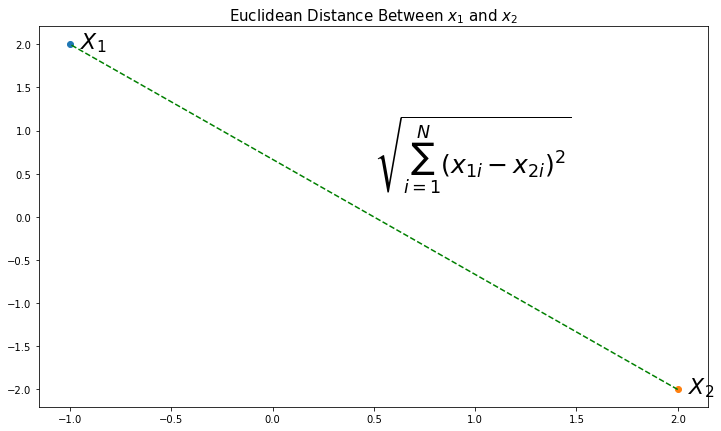

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import euclidean_distances
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

X = np.array([[2, -1], [-2, 2]])

plt.figure(figsize=(12, 7))
for i, (x, y) in enumerate(X):
    plt.scatter(y, x)
    plt.text(y + .05, x -.05, "$X_%d$" % (i+1), size=22)
    
plt.plot(X[0], X[1], "g--")
plt.text(.5, .5, "$\sqrt{\sum_{i=1}^N (x_{1i} - x_{2i})^2}$", size=25)
plt.title("Euclidean Distance Between $x_1$ and $x_2$", size=15)

<a id='km-steps'></a>
## K-Means step-by-step

---


<table width="500" cellpadding="50"> 
<tr>
   <td width="450">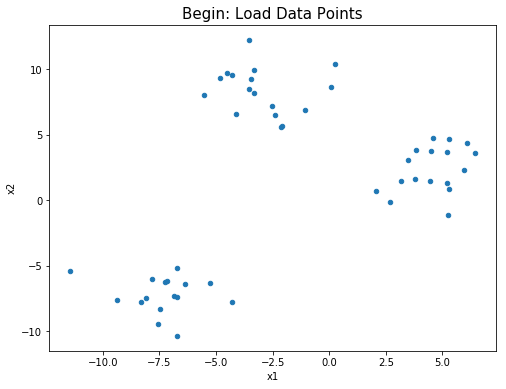</td>
   <td style="vertical-align: top; width: 400px;"><br><br>We begin by loading data in a N-Dimensional feature space <br>(2D for example).</td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td width="450">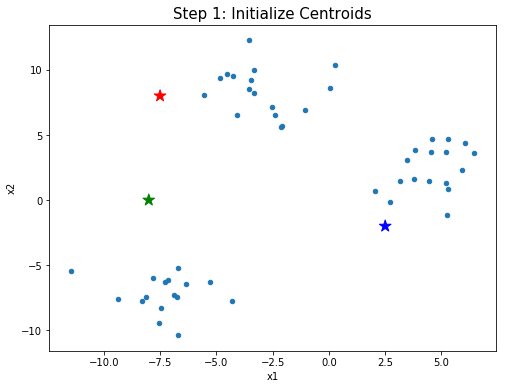</td>
   <td style="align: top; width: 400px; vertical-align: top;"><br><b>Step 1.</b><br>Intialize K centroid (3 here).</td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td width="450">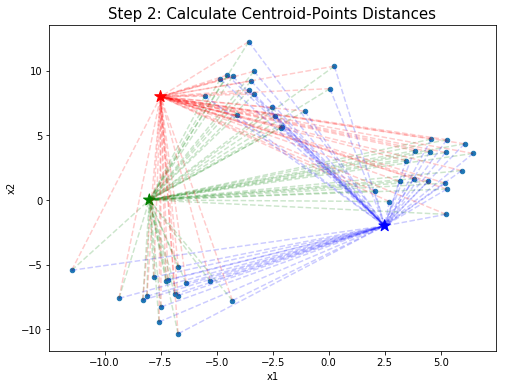</td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 2.</b><br>Assign points to *closest* cluster based on _euclidean distance_.<br><br>$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$

   </td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td width="450">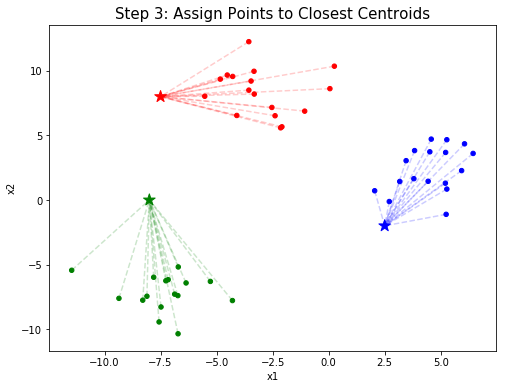</td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 3.</b><br>Calculate mean of points assigned to centroid (2 here).  Update new centroid positions to mean (ie: geometric center).<br><br>$new\ centroid\ position= \bar{x}, \bar{y}$
   </td>
</tr>
<tr>
</table>


<table width=500 cellpadding="50"> 
<tr>
   <td width="450">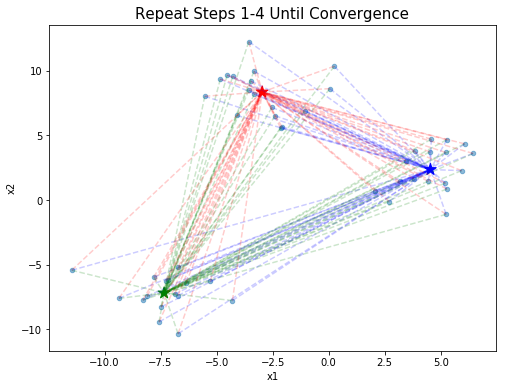</td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 4.</b><br>Repeat step 1-4, updating class membership based on centroid distance.
   </td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td width="450">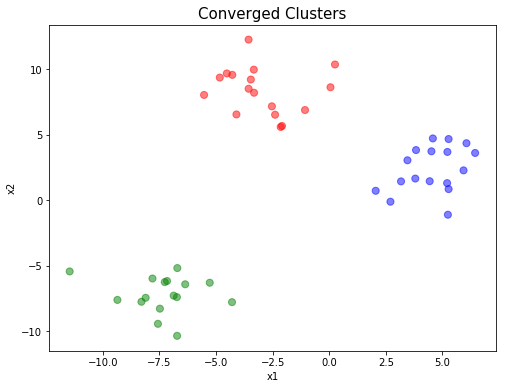</td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Fin.</b><br>Convergence is met once all points no longer change to a new class (defined by closest centroid distance).
   </td>
</tr>
<tr>
</table>

<a id='vis'></a>
## K-Means: Recap

---

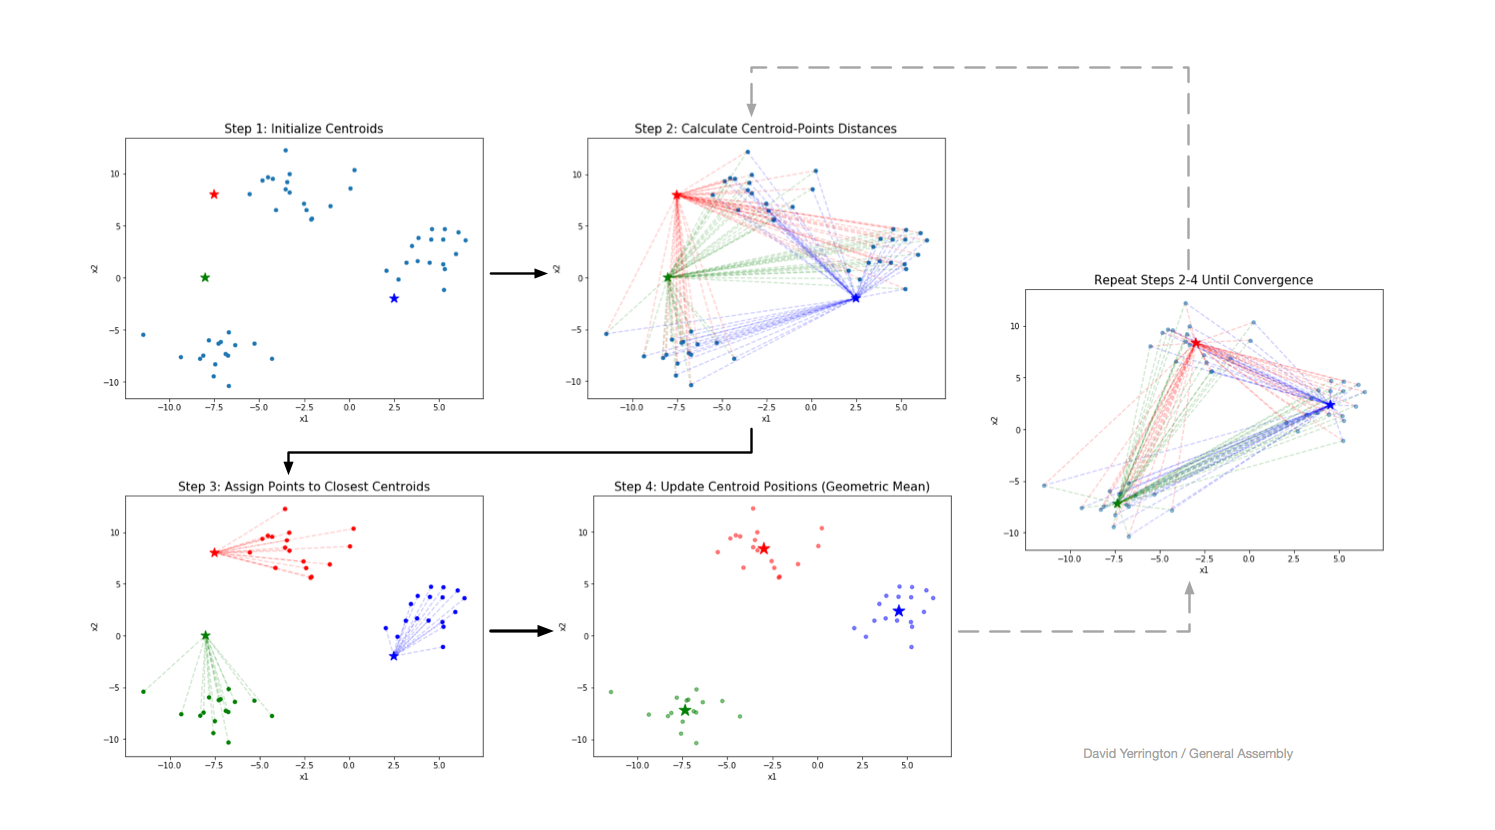

<a id='caveats'></a>
## A few K-Means caveats...

---

Now that we've learned the basic process for K-Means clustering, we should explore the idea that nothing's perfect!  Let's play a game called **"How will it converge!?"**.

### Scenario 1: Wispy Flat Blobs

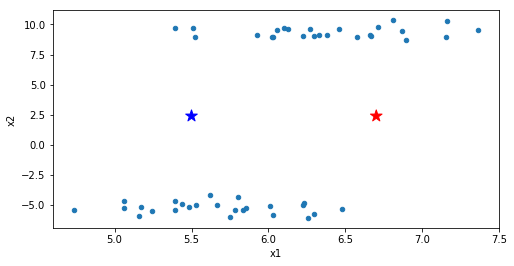

In [4]:
X, color = make_blobs(n_samples=50, random_state=13, centers=2, cluster_std=.5, )
X = map(lambda x: (x[0][0], x[0][1], color[x[1]]), zip(X, color))

points = pd.DataFrame(list(X), columns=["x1", "x2", "color"])
ax = points.plot(kind="scatter", x="x1", y="x2", figsize=(8, 4))

initial_centroids = pd.DataFrame([[5.5, 2.4, "b"], [6.7, 2.4, "r"]], columns=["x1", "x2", "color"])
initial_centroids.plot(kind="scatter", x="x1", y="x2", c=initial_centroids['color'], ax=ax, marker="*", s=150)

### Scenario 2:  The Lone Wolf Point

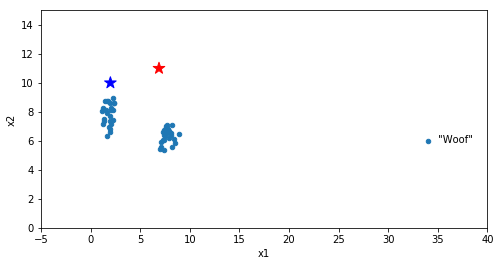

In [5]:
X, color = make_blobs(n_samples=50, random_state=20, centers=2, cluster_std=.5, )
X = list(map(lambda x: (x[0][0], x[0][1], color[x[1]]), zip(X, color)))

X.append([34, 6, 0])

points = pd.DataFrame(list(X), columns=["x1", "x2", "color"])
ax = points.plot(kind="scatter", x="x1", y="x2", figsize=(8, 4))
plt.text(35, 5.9, '"Woof"')
ax.set_ylim(top=15, bottom=0)
ax.set_xlim(left=-5, right=40)

initial_centroids = pd.DataFrame([[2, 10, "b"], [6.9, 11, "r"]], columns=["x1", "x2", "color"])
initial_centroids.plot(kind="scatter", x="x1", y="x2", c=initial_centroids['color'], ax=ax, marker="*", s=150)

### Discussion:  Data vs Centroid Initialization

1. How much is data responsible for "good" clusters?
1. Can you think of any ways to mitigate any potential problems with K-Means based on what you know so far?


<a id='how-many-k'></a>
### How many K?

Sometimes it's obvious, sometimes it's not!  What do you think?

- /poll "How many K:  Figure 1" "1" "2" "3" "4"
- /poll "How many K:  Figure 2" "1" "2" "3" "4"
- /poll "How many K:  Figure 3" "1" "2" "3" "4"

<table>
    <tr>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/4rU39.png"><br>1</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/gq28F.png"><br>2</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="https://snag.gy/cWPgno.jpg"><br>3</td>
    </tr>
</table>

<a id='choose-k'></a>
## Choosing K

---

There are different methods of initializing centroids. For instance:

- Randomly
- Manually
- Special KMeans++ method in Sklearn (_This initializes the centroids to be generally distant from each other_)

**Depending on your problem, you may find some of these are better than others.**

> **Note:** Manual is recommended if you know your data well enough to see the clusters without much help, but rarely used in practice.

<a id='converge'></a>
## A note on K-Means convergence

---

In general, k-means will converge to a solution and return a partition of k clusters, even if no natural clusters exist in the data.  It's entirely possible – in fact, *common* – that the clusters do not mean anything at all. 

**Knowing your domain and dataset is essential. Evaluating the clusters visually is a must (if possible).**

> _"Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference."_ [sklearn Clustering Guide](http://scikit-learn.org/stable/modules/clustering.html#k-means)

![](http://www.datamilk.com/kmeans_animation.gif)

## K-Means in sklearn

---

Below we will implement K-Means using sklearn.

In [6]:
%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

X, color = make_blobs(n_samples=100, random_state=29, centers=3, cluster_std=1.5, )
X = map(lambda x: (x[0][0], x[0][1], color[x[1]]), zip(X, color))

df = pd.DataFrame(list(X), columns=["x1", "x2", "color"])
df.head()

,x1,x2,color
0,7.081642,-5.248171,0
1,-3.036735,-0.129646,0
2,5.117565,-3.323573,0
3,-1.807058,-0.335986,0
4,4.519789,-5.469635,0


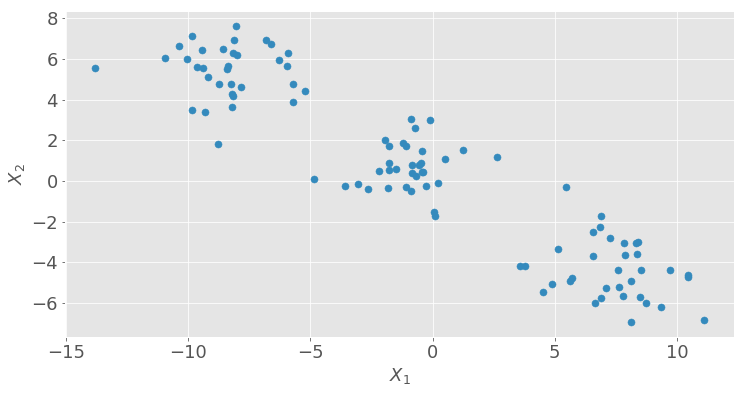

In [7]:
ax = df.plot(kind="scatter", x="x1", y="x2", figsize=(12,6), s=50)
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [8]:
X = df.drop('color', axis=1)

In [9]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

After we fit our data, we can get our predicted labels from `model.labels_` and the center points`model.cluster_centers_`.

In [10]:
X

,x1,x2
0,7.081642,-5.248171
1,-3.036735,-0.129646
2,5.117565,-3.323573
3,-1.807058,-0.335986
4,4.519789,-5.469635
5,-8.175231,4.198368
6,-0.865955,3.022139
7,-9.374122,5.560421
8,8.488326,-5.722628
9,-0.121532,3.014428


In [11]:
model.labels_

array([0, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0,
       0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1,
       1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1,
       0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2], dtype=int32)

In [12]:
df['predicted'] = model.labels_
df.head()

,x1,x2,color,predicted
0,7.081642,-5.248171,0,0
1,-3.036735,-0.129646,0,2
2,5.117565,-3.323573,0,0
3,-1.807058,-0.335986,0,2
4,4.519789,-5.469635,0,0


### Visually verifying cluster labels

In [13]:
centroids = pd.DataFrame(model.cluster_centers_)
centroids = centroids.rename(columns={0: 'x1', 1: 'x2'})

In [14]:
df.head()

,x1,x2,color,predicted
0,7.081642,-5.248171,0,0
1,-3.036735,-0.129646,0,2
2,5.117565,-3.323573,0,0
3,-1.807058,-0.335986,0,2
4,4.519789,-5.469635,0,0


In [15]:
df

,x1,x2,color,predicted
0,7.081642,-5.248171,0,0
1,-3.036735,-0.129646,0,2
2,5.117565,-3.323573,0,0
3,-1.807058,-0.335986,0,2
4,4.519789,-5.469635,0,0
5,-8.175231,4.198368,2,1
6,-0.865955,3.022139,0,2
7,-9.374122,5.560421,2,1
8,8.488326,-5.722628,0,0
9,-0.121532,3.014428,0,2


<Figure size 504x504 with 0 Axes>

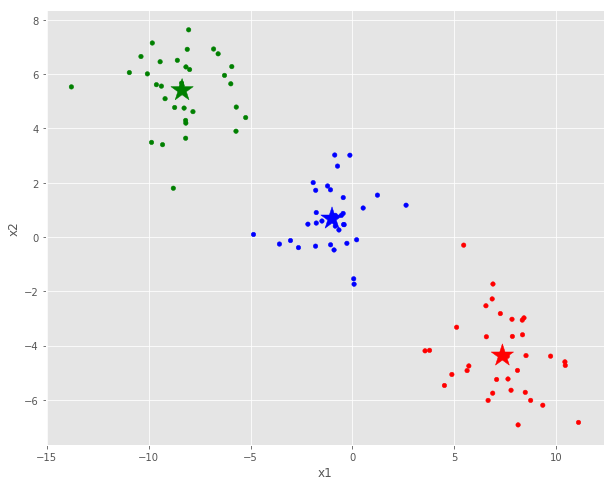

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

colors = ["red", "green", "blue"]
df['color'] = df['predicted'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="x1", y="x2",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="x1", y="x2", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
)

<a id='sil'></a>

## Metrics: inertia and the silhouette coefficient

---

**Inertia** -- sum of squared errors for each cluster.
- low inertia = dense cluster

> As the number of clusters k increases, inertia decreases. 
>
> **Any problems with just increasing K to get a better intertia score (thread)?**

**Silhouette Coefficient** 

- measure of how far apart clusters are
- high Silhouette = clusters are well separated

The Silhouette Coefficent is the averge of Silhouette $s$ of each point within a cluster in relation to other clusters.

$cohesion = \text{Average distance of points within clusters}$

<img src="https://snag.gy/1KE743.jpg" style="width: 600px">

$separation = \text{Average distance of points in one cluster to points in other clusters}$

<img src="https://snag.gy/6YvQPL.jpg" style="width: 600px">

$s(x) = \frac{separation(X)\ -\ cohesion(X)}{max\{cohesion(X),\ separation(X)\}}$

$SC(X) = \frac{1}{N}\sum\limits_{n=1}^{N} {s(x)}$

-1 = Bad
0 = Meh
1 = Good

The silhouette coefficient evaluates the viability of your clusters. It is a way to quantify the "cohesion" of local points to their clusters and the separation to other clusters.

### (Optional) - Silhouette From Scratch

In [17]:
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns

clusters   = df.predicted.unique()
cohesion, separation  = np.zeros(len(clusters)), np.zeros(len(clusters))

for index, cluster_n in enumerate(clusters):
    X                =  df.query("predicted == %s" % cluster_n)[['x1', 'x2']]
    dist_matrix      =  pairwise_distances(X, metric="euclidean")
    cohesion[index]  =  np.mean(dist_matrix)

for index, current_cluster in enumerate(clusters):
    
    current_x         =  df.query("predicted == %s" % current_cluster)[['x1', 'x2']]
    other_x           =  df.query("predicted != %s" % current_cluster)[['x1', 'x2']]
    dist_matrix       =  pairwise_distances(current_x, other_x, metric="euclidean")

    separation[index] =  np.mean(dist_matrix)

(np.mean(separation) - np.mean(cohesion)) / np.maximum(np.mean(separation), np.mean(cohesion))

0.7962908527932993

### Our manual calculations are approximate
The full function takes into account a qualifying condition that the minimum distance between clusters by closest points in each, rather than the mean points.  This is ok for our understanding for now but don't take my word for it, check out the [[source]](https://github.com/scikit-learn/scikit-learn/blob/f3320a6f/sklearn/metrics/cluster/unsupervised.py#L104)!

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(df[['x1', 'x2']], df['predicted'])

0.7011084016787069

### Programatically Inspecting $K$

Since we're familliar with gridsearch now, let's try it out!  Gridsearch is typically used for supervised learning with some scoring objective for optimizing parameters in terms of `best_model`.  We don't really care about the best model as much as we want to see how either inertia or silhouette score changes based on $K$.

We will write a basic process for exploring inertia and silhouette, that you can feel free to adapt to any other ML process you might write in Sklearn for doing custom scoring (using GridsearchCV is better for supervised learning because it has cross validation built-in!).

> Visually inspecting your clusters is vastly superior to relying on programatic parameter searching for an ideal cluster for most data.  You can also invent your own evalutation metrics other than inertia or silhoette.  The world is also bigger than K-Means when it comes to cluster applications.  It's a great first stop in your journey of clustering.

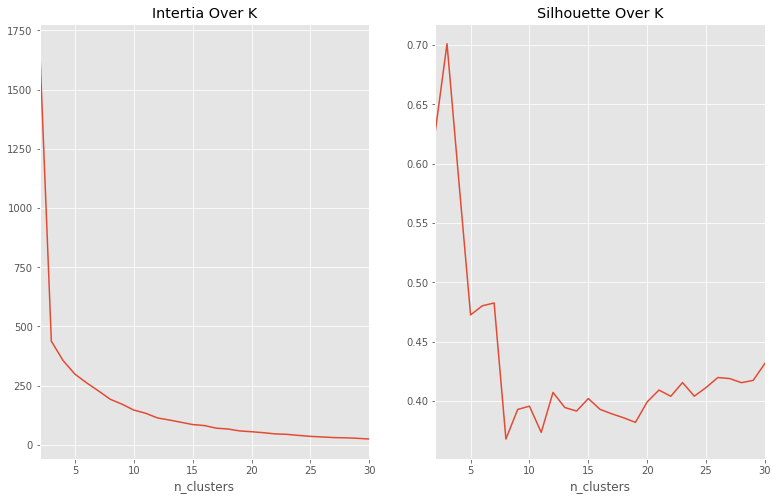

In [19]:
from sklearn.metrics import silhouette_score 

param_grid = {'n_clusters': np.arange(2, 31)}
param_grid = dict(n_clusters=np.arange(2, 31)) # same thing

class EvalKmeans:
    
    model = None
    scores_ = []
    
    def __init__(self, param_grid):
        self.param_grid = param_grid
    
    def fit(self, X, scorer="silhouette"):
        
        for param, values in self.param_grid.items():
            
            for value in values:
        
                estimator = KMeans(n_clusters = value)
                model = estimator.fit(X)
                
                score = silhouette_score(X, model.labels_)
                
                self.scores_.append({
                    param:        value,
                    "inertia":    model.inertia_,
                    "silhouette": score
                })
                
    def get_scores(self):
        return pd.DataFrame(self.scores_)
    
kmeans = EvalKmeans(param_grid)
kmeans.fit(df[["x1", "x2"]])

eval_scores = kmeans.get_scores()
eval_scores.set_index("n_clusters", inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(13, 8))
eval_scores["inertia"].plot(ax=ax[0], title="Intertia Over K")
eval_scores["silhouette"].plot(ax=ax[1], title="Silhouette Over K")


In [20]:
kmeans.param_grid

{'n_clusters': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}

In [21]:
eval_scores = kmeans.get_scores()
eval_scores

,inertia,n_clusters,silhouette
0,1694.163289,2,0.626874
1,437.605504,3,0.701108
2,355.715774,4,0.585865
3,298.693659,5,0.472527
4,261.721439,6,0.480214
5,227.876062,7,0.482573
6,192.588652,8,0.367922
7,171.853133,9,0.392854
8,146.933847,10,0.395600
9,133.653386,11,0.373520


## Conclusion: K-Means tradeoffs

---

**K-Means:**
- Unsupervised clustering model
- Similar to KNN (but for “clustering”)
- Iteratively finds labels given K
- Easy to implement in sklearn
- Sensitive to shape, scale of data
- Optimal K hard to evaluate

---

| Strengths | Weaknesses |
| -- | -- |
| K-Means is popular because it's simple and computationally efficient. | However, K-Means is highly scale dependent and isn't suitable for data of varying shapes and densities. |
| Easy to see results / intuitive. | Evaluating results is more subjective, requiring much more human evaluation than trusted metrics. |

<a id='sensitive'></a>
### K-Means is sensitive to outliers

![](https://snag.gy/WFNMQY.jpg)

<a id='centroid-init'></a>
### K-Means is sensitive to centroid initialization

![](https://snag.gy/5sigCD.jpg)

<a id='resources'></a>

## Additional resources

---

- Andrew Moore's CS class at Carnegie Mellon contains good static visualization, step-by-step. His slide deck is online here: https://www.autonlab.org/tutorials/kmeans11.pdf. He also links to more of his tutorials on the first page. 
- [Sci-Kit Learn Clustering Overview](http://scikit-learn.org/stable/modules/clustering.html#k-means)
- [SKLearn K-Means Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
- [SKLearn Clustering Code - See _k_init__ for explanation of k++ centroid selection](https://github.com/scikit-learn/scikit-learn/blob/51a765a/sklearn/cluster/k_means_.py#L769)
- [Clustering Tutorial](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/)
- [Wikipedia's Deep Dive on Clustering](https://en.wikipedia.org/wiki/K-means_clustering)
- [An excellent blog from Galvanize on K-Means Clustering](http://www.galvanize.com/blog/introduction-k-means-cluster-analysis/#.V9aXqpOAOkp)

- [Unsupervised learning](#unsupervised)
- [Introduction to clustering](#intro)
- [What is clustering?](#what)
- [KNN review](#knn)
- [Clustering algorithms](#algos)
- [K-means clustering](#k-means)
- [Refresher: Euclidean distance](#euclidean)
- [K-Means step-by-step](#km-steps)
- [K-Means: a visual example](#vis)
- [K-Means caveats and pitfalls](#caveats)
    - [Sensitive to outliers](#sensitive)
    - [Sensitive to centroid initialization](#centroid-init)
    - [How many K?](#how-choose-k)
- [Choosing K](#choose-k)
- [A note on K-Means convergence](#converge)
- [K-Means in sklearn](#sklearn)
    - [Visually verifying cluster labels](#verify)
- [Metrics: inertia and the silhouette coefficient](#sil)
- [Practice: use K-Means on the "Isotopic Composition Plutonium Batches" data](#pluto)
    - [How does scaling affect fit?](#scaling)
- [Conclusion: K-Means tradeoffs](#conclusion)
- [Additional resources](#resources)

**Some helpful stackexchange questions:**
- http://stats.stackexchange.com/questions/40613/why-dont-dummy-variables-have-the-continuous-adjacent-category-problem-in-clust
- http://stats.stackexchange.com/questions/174556/k-means-clustering-with-dummy-variables
- http://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data
- http://www-01.ibm.com/support/docview.wss?uid=swg21477401
